In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [11]:
df = pd.read_excel("Airlines+Data.xlsx",index_col=0, parse_dates=True)

In [3]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [4]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<Axes: xlabel='Month'>

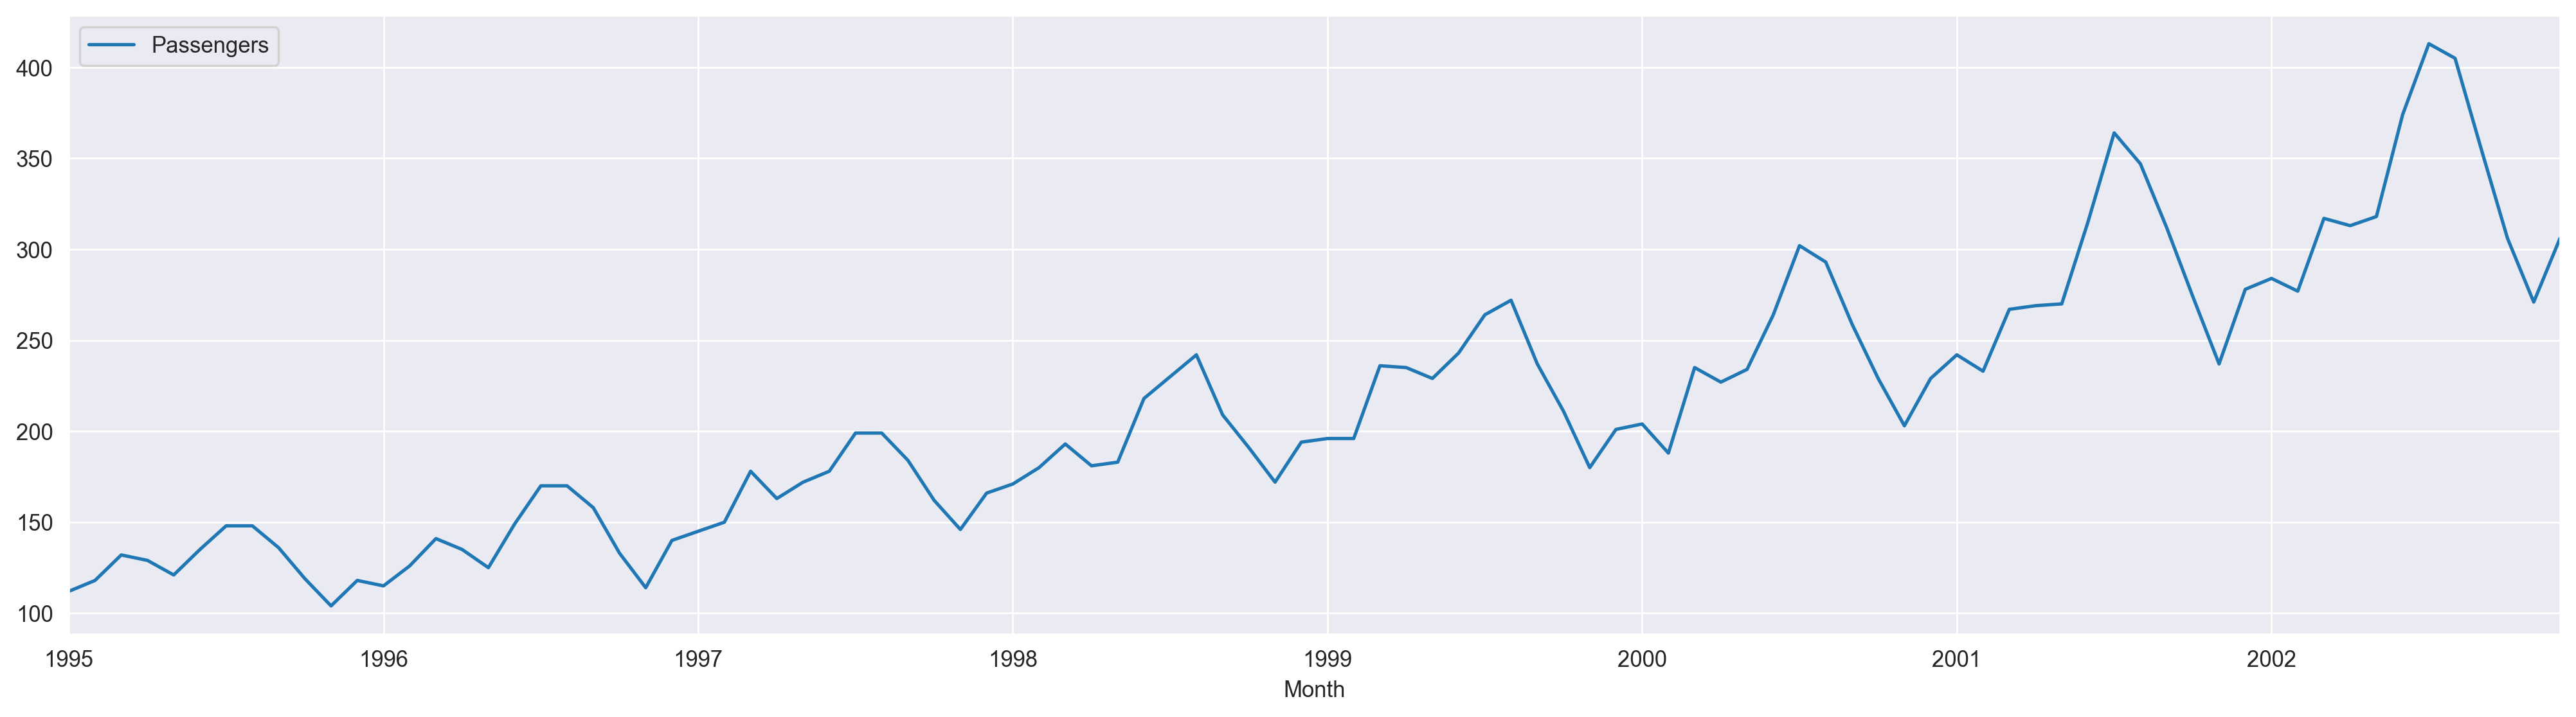

In [5]:
df.plot()

In [6]:
df.isnull().sum()

Passengers    0
dtype: int64

In [12]:
df['First'] = df['Passengers'].diff(periods=1)


In [13]:
df.dropna(inplace=True)


In [14]:
df

,Passengers,First
Month,,
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
1995-06-01,135,14.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


<Axes: xlabel='Month'>

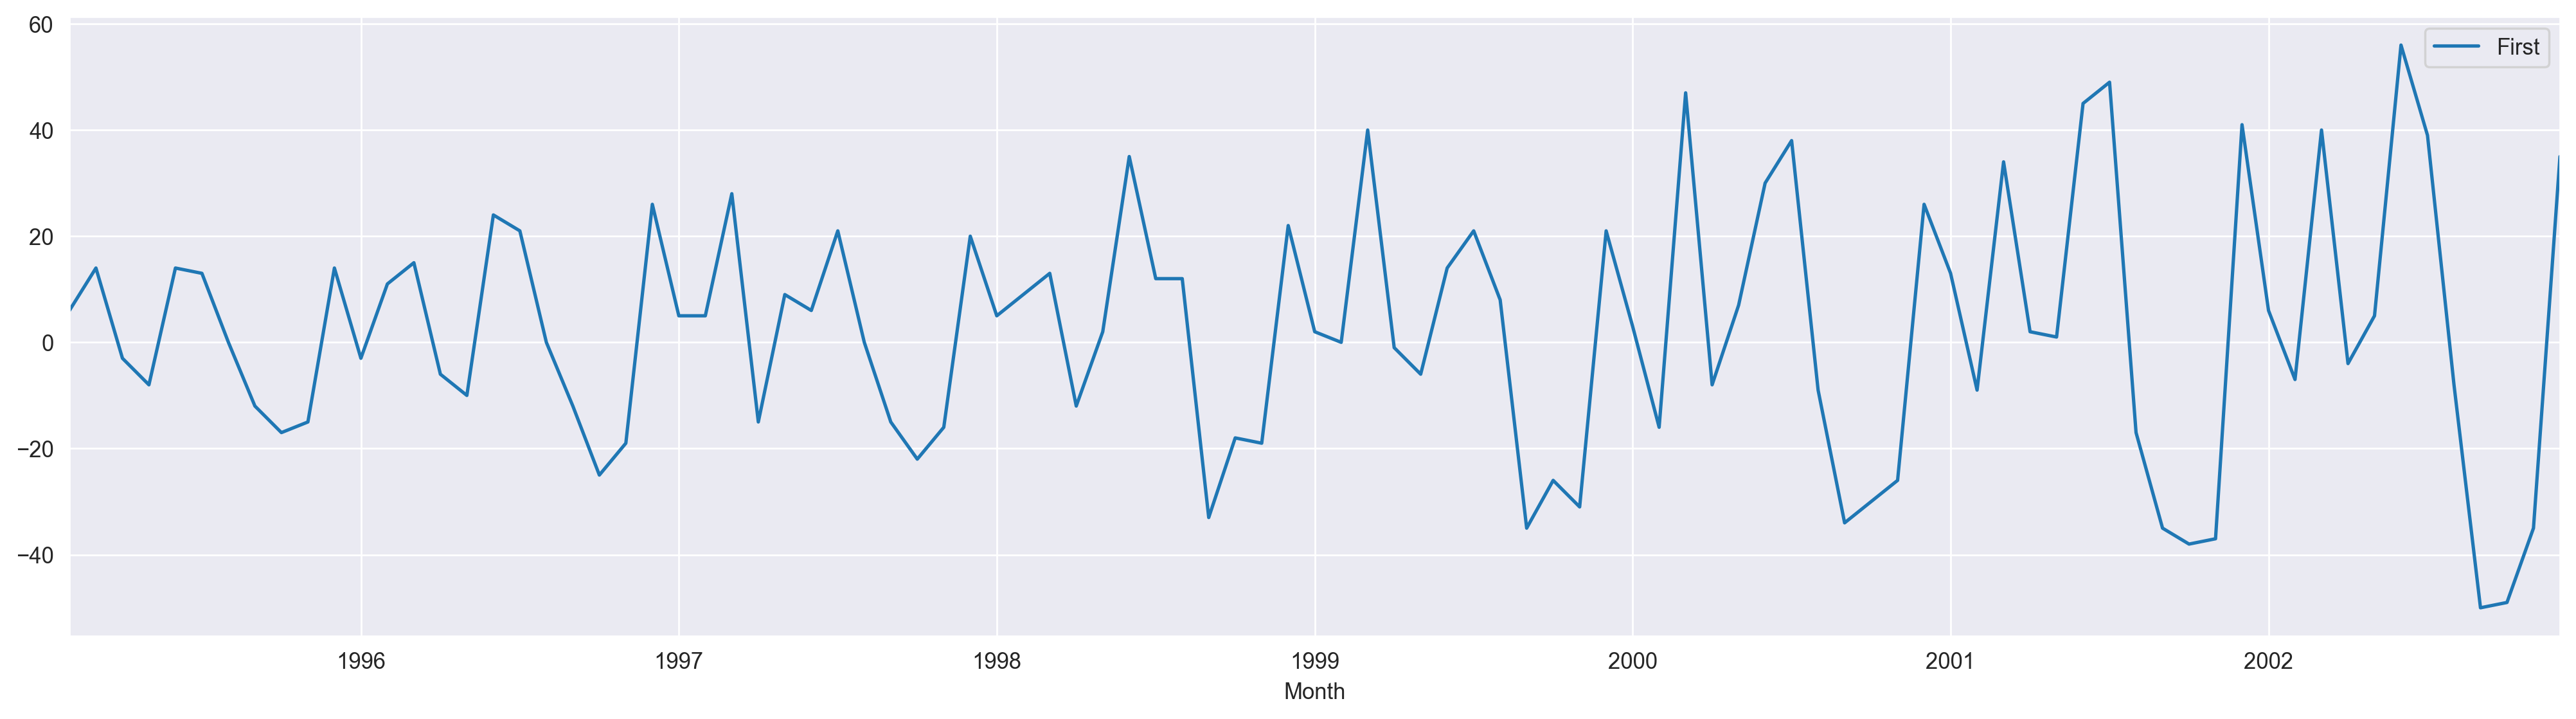

In [16]:
df.plot(y='First')

In [18]:
order = auto_arima(df['First'])

In [19]:
order

ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [21]:
data = df.drop(columns='Passengers')

In [22]:
data

,First
Month,
1995-02-01,6.0
1995-03-01,14.0
1995-04-01,-3.0
1995-05-01,-8.0
1995-06-01,14.0
...,...
2002-08-01,-8.0
2002-09-01,-50.0
2002-10-01,-49.0


In [30]:
data.shape

(95, 1)

In [23]:
train = data.iloc[:-30]
test = data.iloc[-30:]

In [24]:
train.shape

(65, 1)

In [25]:
train

,First
Month,
1995-02-01,6.0
1995-03-01,14.0
1995-04-01,-3.0
1995-05-01,-8.0
1995-06-01,14.0
...,...
2000-02-01,-16.0
2000-03-01,47.0
2000-04-01,-8.0


In [26]:
test.shape

(30, 1)

In [27]:
model = ARIMA(train['First'], order=(3, 0, 2)).fit()

In [28]:
test

,First
Month,
2000-07-01,38.0
2000-08-01,-9.0
2000-09-01,-34.0
2000-10-01,-30.0
2000-11-01,-26.0
2000-12-01,26.0
2001-01-01,13.0
2001-02-01,-9.0
2001-03-01,34.0


In [29]:
test

,First
Month,
2000-07-01,38.0
2000-08-01,-9.0
2000-09-01,-34.0
2000-10-01,-30.0
2000-11-01,-26.0
2000-12-01,26.0
2001-01-01,13.0
2001-02-01,-9.0
2001-03-01,34.0


In [31]:
ypred = model.predict(start =65, end = 94)
ypred

2000-07-01    0.052817
2000-08-01   -7.343900
2000-09-01   -4.703767
2000-10-01   -1.462784
2000-11-01    1.201694
2000-12-01    1.983586
2001-01-01    2.410737
2001-02-01    2.168684
2001-03-01    2.184516
2001-04-01    1.990953
2001-05-01    2.051047
2001-06-01    1.965339
2001-07-01    2.032809
2001-08-01    1.983161
2001-09-01    2.030407
2001-10-01    1.994605
2001-11-01    2.025486
2001-12-01    1.999997
2002-01-01    2.020916
2002-02-01    2.003367
2002-03-01    2.017804
2002-04-01    2.005795
2002-05-01    2.015748
2002-06-01    2.007503
2002-07-01    2.014345
2002-08-01    2.008676
2002-09-01    2.013378
2002-10-01    2.009480
2002-11-01    2.012711
2002-12-01    2.010032
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
print(np.sqrt(mean_squared_error(test['First'], ypred)))

31.542996453378777
